<a href="https://colab.research.google.com/github/jedrzej00/viewereeg/blob/master/TKEO_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lib import and data load

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
File_name = "SS_record-[2015.09.17-15.11.32]"
df = pd.read_csv(File_name + ".csv") 

In [161]:
#Event_id holds time of events only 205 rows
bool_series = pd.notnull(df["Event_Id"]) 
df[bool_series]

,Time345Hz,Epoch,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Event_Id,Event_Date,Event_Duration
1725,5.000000,53,-1.912633,42.657425,-10.411392,46.818104,-9.400260,-4.109832,28.487614,49.096817,-8.094042,47.433121,32775:33282,5.0000000000:5.0000000000,0.0000000000:0.0000000000
8625,25.000000,269,2.522410,7.348517,0.658758,7.282865,2.047918,-6.886196,3.501716,8.728677,-1.500454,13.698050,32776:33282,25.0000000000:25.0000000000,0.0000000000:0.0000000000
10350,30.000000,323,3.528986,2.859917,4.970655,-3.270790,5.043643,2.735358,1.567849,6.766585,10.121133,3.619192,768:786,30.0000000000:30.0000000000,0.0000000000:0.0000000000
11040,32.000000,345,-16.630236,-24.261017,-20.024189,-19.133987,-12.211804,-17.997955,-24.364635,-20.627056,-18.450676,-23.392000,33282,32.0000000000,0.0000000000
11385,33.000000,355,-1.679545,-5.847584,-6.768849,-15.864432,-3.942690,0.453738,0.107399,4.520875,1.169256,4.061976,770,33.0000000000,0.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158441,459.249275,4951,-60.173580,-49.431145,-93.980965,-75.102196,-135.328094,4.744647,-5.545691,-162.293488,-117.854637,-65.395943,781,459.2500000000,0.0000000000
159735,463.000000,4991,-2.778278,13.793880,15.574841,46.927559,20.527122,-20.375187,-8.652200,58.935875,12.252268,19.846369,800,463.0000000000,0.0000000000
160425,465.000000,5013,-44.436665,-21.226126,-84.243286,-58.745682,-98.059654,-10.750548,-2.455004,-107.722397,-77.557358,-31.055021,1010,465.0000000000,0.0000000000
162150,470.000000,5067,-33.016243,6.083935,-39.052273,-30.203585,-12.101546,-10.453320,13.006208,0.785169,-37.409836,-3.157582,33281,470.0000000000,0.0000000000


##TKEO calculations

In [43]:
df.head()

,Time345Hz,Epoch,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Event_Id,Event_Date,Event_Duration
0,0.000000,0,-5.192708,10.874015,-0.169481,28.420797,-9.902622,-2.941348,16.019693,21.373163,-3.530942,14.741348,NaN,NaN,NaN
1,0.002899,0,-4.811602,9.520370,-0.752539,27.603233,-9.492777,-3.793050,15.271902,20.472820,-3.754041,13.668789,NaN,NaN,NaN
2,0.005797,0,-4.862282,9.367349,-1.389566,27.835459,-9.296375,-4.810861,15.637087,20.404449,-3.934754,13.834256,NaN,NaN,NaN
3,0.008696,0,-5.754417,10.096045,-2.239412,28.820263,-9.700782,-6.171382,16.770576,20.862041,-4.435250,14.990154,NaN,NaN,NaN
4,0.011594,0,-6.418258,10.319262,-2.562741,29.147823,-9.649807,-6.864820,17.176014,20.839088,-4.571852,15.685919,NaN,NaN,NaN


In [6]:
df.Channel_1.diff()

0              NaN
1         0.381106
2        -0.050680
3        -0.892136
4        -0.663840
            ...   
169595   -0.561977
169596   -0.850412
169597   -1.992626
169598   -3.777540
169599   -4.468859
Name: Channel_1, Length: 169600, dtype: float64

In [9]:
dx=df.Time345Hz[1]
print (dx)
np.gradient(df.Channel_1,dx,edge_order=2) #this method was tested in labview environment
pochodna = np.gradient(df.Channel_1,dx,edge_order=2)

0.0028985506


In [0]:
TKEO1 = (np.gradient(df.Channel_1,dx,edge_order=2)) ** 2 - df.Channel_1 * np.gradient(np.gradient(df.Channel_1,dx,edge_order=2),dx,edge_order=2)

##Visualisation 

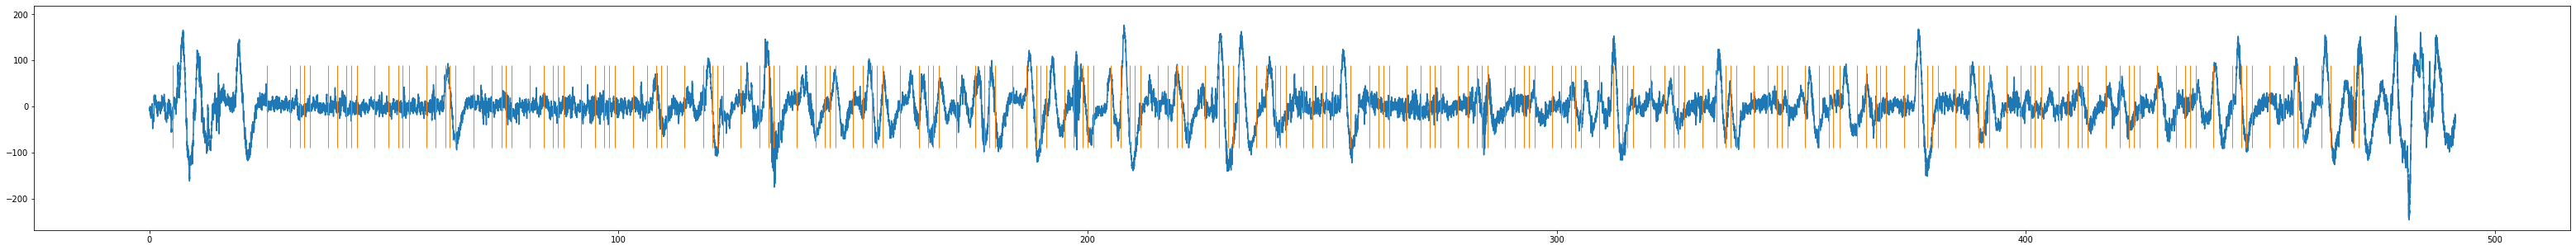

In [26]:
plt.figure(figsize=(55,5))
plt.plot(df.Time345Hz, df.Channel_1);
plt.plot(df[bool_series].Time345Hz, np.zeros(205), '|', ms=100);

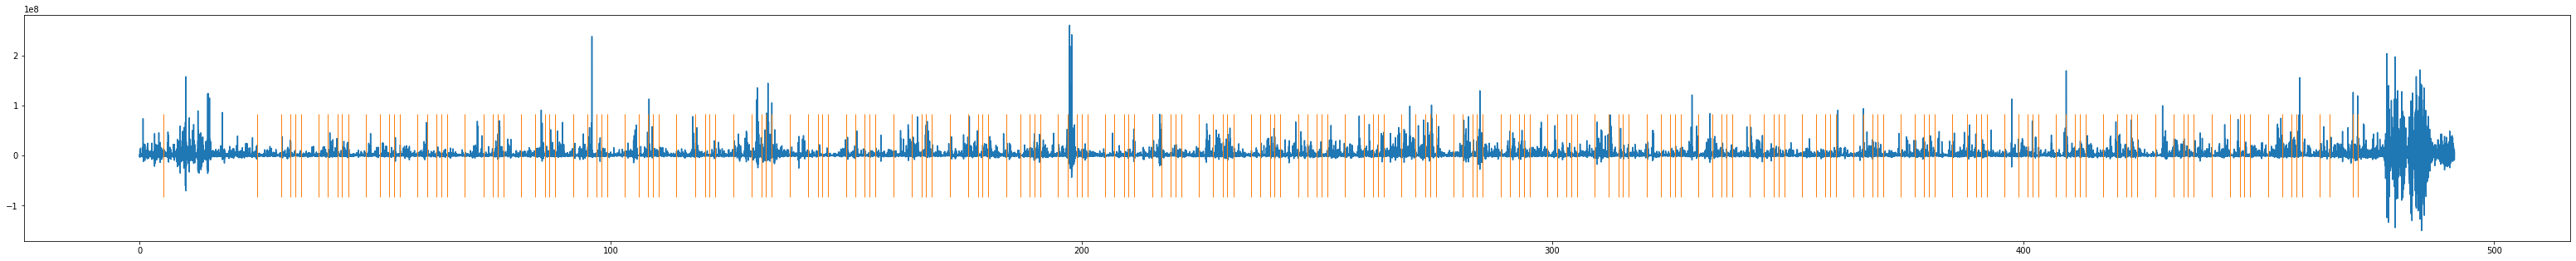

In [157]:
plt.figure(figsize=(55,5))
plt.plot(df.Time345Hz, TKEO1);
plt.plot(df[bool_series].Time345Hz, np.zeros(205), '|', ms=100);

##Added columns wit TKEO per channels and saving to CSV

In [166]:
df.head()

,Time345Hz,Epoch,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Event_Id,Event_Date,Event_Duration,Channel_1_TKEO,Channel_2_TKEO,Channel_3_TKEO,Channel_4_TKEO,Channel_5_TKEO,Channel_6_TKEO,Channel_7_TKEO,Channel_8_TKEO,Channel_9_TKEO,Channel_10_TKEO
0,0.000000,0,-5.192708,10.874015,-0.169481,28.420797,-9.902622,-2.941348,16.019693,21.373163,-3.530942,14.741348,NaN,NaN,NaN,-161148.484041,-1.202701e+06,36517.089589,-3.588056e+06,-105674.020372,27625.692073,-2.083982e+06,-2.104868e+06,62969.383445,-1.940255e+06
1,0.002899,0,-4.811602,9.520370,-0.752539,27.603233,-9.492777,-3.793050,15.271902,20.472820,-3.754041,13.668789,NaN,NaN,NaN,-302689.854054,-1.202611e+06,35904.202902,-3.194742e+06,-339647.511969,9075.217853,-1.862113e+06,-1.812988e+06,-16665.075873,-1.888991e+06
2,0.005797,0,-4.862282,9.367349,-1.389566,27.835459,-9.296375,-4.810861,15.637087,20.404449,-3.934754,13.834256,NaN,NaN,NaN,-246480.503812,-6.754361e+05,67724.445695,-1.527754e+06,-264183.949539,141911.083725,-8.272584e+05,-8.475517e+05,-13505.747805,-1.083702e+06
3,0.008696,0,-5.754417,10.096045,-2.239412,28.820263,-9.700782,-6.171382,16.770576,20.862041,-4.435250,14.990154,NaN,NaN,NaN,148047.489914,5.459076e+05,149327.692328,1.893364e+06,378932.046447,499305.786916,1.338810e+06,8.603027e+05,156555.977461,8.660053e+05
4,0.011594,0,-6.418258,10.319262,-2.562741,29.147823,-9.649807,-6.864820,17.176014,20.839088,-4.571852,15.685919,NaN,NaN,NaN,375002.261931,1.591061e+06,145478.372188,4.371995e+06,722691.192086,548178.192520,3.067143e+06,1.719603e+06,221025.090644,2.660706e+06


In [0]:
##adding TKEO for Channels
SUFFIX_CAT = '_TKEO'
feat_list = ['Channel_1','Channel_2','Channel_3','Channel_4','Channel_5','Channel_6','Channel_7','Channel_8','Channel_9','Channel_10']
for feat in feat_list:
  if isinstance(df[feat][0], list ): continue
  TKEO_values = (np.gradient(df[feat],dx,edge_order=2)) ** 2 - df[feat] * np.gradient(np.gradient(df[feat],dx,edge_order=2),dx,edge_order=2)
  if SUFFIX_CAT in feat:
    df[feat] = TKEO_values
  else:
    df[feat + SUFFIX_CAT] =  TKEO_values

In [0]:
df.to_csv(File_name + "_TKEO.csv")

In [168]:
!ls

 sample_data
'SS_record-[2015.09.17-15.11.32].csv'
'SS_record-[2015.09.17-15.11.32]_TKEO.csv'
